In [2]:
import cv2
import numpy as np
#创建一个大小800*800的空帧
frame = np.zeros((800,800,3),np.uint8)
#初始化测量坐标和鼠标运动预测的数组
last_measurement = current_measurement = np.array((2,1),np.float32)

last_predicition = current_prediction = np.zeros((2,1),np.float32)
'''
    mousemove()函数在这里的作用就是传递X,Y的坐标值，便于对轨迹进行卡尔曼滤波
'''
def mousemove(event,x,y,s,p):
    #定义全局变量
    global frame,current_measurement,measurements,last_measurement,current_prediction,last_prediction
    #初始化
    last_measurement = current_measurement
    last_prediction = current_prediction
    current_x = np.float32(x)
    current_y = np.float32(y)
    #传递当前测量坐标值
    current_measurement = np.array([[current_x],[current_y]])
    #用来修正卡尔曼滤波的预测结果
    kalman.correct(current_measurement)
    # 调用kalman这个类的predict方法得到状态的预测值矩阵，用来估算目标位置
    current_prediction = kalman.predict()
    #上一次测量值
    lmx,lmy = last_measurement[0],last_measurement[1]
    #当前测量值
    cmx,cmy = current_measurement[0],current_measurement[1]
    #上一次预测值
    lpx,lpy = last_prediction[0],last_prediction[1]
    #当前预测值
    cpx,cpy = current_prediction[0],current_prediction[1]
    #绘制测量值轨迹（绿色）
    cv2.line(frame,(int(lmx),int(lmy)),(int(cmx),int(cmy)),(0,100,0))
    #绘制预测值轨迹（红色）
    cv2.line(frame,(int(lpx),int(lpy)),(int(cpx),int(cpy)),(0,0,200))

cv2.namedWindow("kalman_tracker")
#调用函数处理鼠标事件，具体事件必须由回调函数的第一个参数来处理，该参数确定触发事件的类型（点击和移动）
'''
void setMousecallback(const string& winname, MouseCallback onMouse, void* userdata=0)
       winname:窗口的名字
       onMouse:鼠标响应函数，回调函数。指定窗口里每次鼠标时间发生的时候，被调用的函数指针。
                这个函数的原型应该为void on_Mouse(int event, int x, int y, int flags, void* param);
       userdate：传给回调函数的参数

 void on_Mouse(int event, int x, int y, int flags, void* param);
        event是 CV_EVENT_*变量之一
        x和y是鼠标指针在图像坐标系的坐标（不是窗口坐标系）
        flags是CV_EVENT_FLAG的组合， param是用户定义的传递到setMouseCallback函数调用的参数。
    常用的event：
        CV_EVENT_MOUSEMOVE
        CV_EVENT_LBUTTONDOWN
        CV_EVENT_RBUTTONDOWN
        CV_EVENT_LBUTTONUP
        CV_EVENT_RBUTTONUP
        和标志位flags有关的：
        CV_EVENT_FLAG_LBUTTON
'''
cv2.setMouseCallback("kalman_tracker",mousemove)
'''
Kalman这个类需要初始化下面变量：
转移矩阵，测量矩阵，控制向量(没有的话，就是0)，
过程噪声协方差矩阵，测量噪声协方差矩阵，
后验错误协方差矩阵，前一状态校正后的值，当前观察值。
    在此cv2.KalmanFilter(4,2)#???表示状态维度为4，测量矩阵维度为2 （x，y，dx，dy)

卡尔曼滤波模型假设k时刻的真实状态是从(k − 1)时刻的状态演化而来，符合下式：
            X(k) = F(k) * X(k-1) + B(k)*U(k) + W（k）
其中
F(k)  是作用在xk−1上的状态变换模型（/矩阵/矢量）。 
B(k)  是作用在控制器向量uk上的输入－控制模型。 
W(k)  是过程噪声，并假定其符合均值为零，协方差矩阵为Qk的多元正态分布。
'''
kalman = cv2.KalmanFilter(4,2)
#设置测量矩阵 H
kalman.measurementMatrix = np.array([[1,0,0,0],[0,1,0,0]],np.float32)
#设置转移矩阵 F
kalman.transitionMatrix = np.array([[1,0,1,0],[0,1,0,1],[0,0,1,0],[0,0,0,1]],np.float32)
#设置过程噪声协方差矩阵 Q
kalman.processNoiseCov = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]],np.float32)*0.03

while True:
    cv2.imshow("kalman_tracker",frame)
    if (cv2.waitKey(30) & 0xff) == ord ('q'):
        break
        

cv2.destroyAllWindows()
cv2.waitKey(1)

2022-01-14 14:06:28.990 python[20508:4824308] IMKClient Stall detected, *please Report* your user scenario attaching a spindump (or sysdiagnose) that captures the problem - (imkxpc_bundleIdentifierWithReply:) block performed very slowly (361.15 secs).


-1

improvement：

In [ ]:
# delta_t：


In [ ]:
def mousemove(event,x,y,s,p):
    #定义全局变量
    global frame,current_measurement,measurements,last_measurement,current_prediction,last_prediction,t
    #初始化
    last_measurement = current_measurement
    last_prediction = current_prediction
    current_x = np.float32(x)
    current_y = np.float32(y)
    #distance = np.sqrt(np.square( current_x - last_measurement[0])+np.square(current_y-last_measurement[1]))# numpy.sqrt(numpy.sum(numpy.square(vec1 - vec2)))
    #velocity = distance / delta_t
    #acceleration = velocity / delta_t
    #jerk= acceleration / delta_t
    # 传递当前测量坐标值
    #position_current_measurement = np.array([[current_x],[current_y],[distance],[velocity],[acceleration],[jerk]])
    current_measurement=np.array([[current_x],[current_y]])
    # 用来修正卡尔曼滤波的预测结果
    kalman.correct(current_measurement)
    # 调用kalman这个类的predict方法得到状态的预测值矩阵，用来估算目标位置
    current_prediction = kalman.predict()
    #上一次测量值
    lmx,lmy = last_measurement[0],last_measurement[1]
    #当前测量值
    cmx,cmy = current_measurement[0],current_measurement[1]
    #上一次预测值
    lpx,lpy = last_prediction[0],last_prediction[1]
    #当前预测值
    cpx,cpy = current_prediction[0],current_prediction[1]
    #绘制测量值轨迹（绿色）
    cv2.line(frame,(int(lmx),int(lmy)),(int(cmx),int(cmy)),(0,100,0))
    #绘制预测值轨迹（红色）
    cv2.line(frame,(int(lpx),int(lpy)),(int(cpx),int(cpy)),(0,0,200))

In [2]:
import cv2
import numpy as np
from datetime import datetime
#创建一个大小800*800的空帧
frame = np.zeros((800,800,3),np.uint8)
#初始化测量坐标和鼠标运动预测的数组 （x,y,单位时间移动距离，速度，加速度，加速度变化量）
last_measurement = current_measurement = np.array((4,1),np.float32)

last_predicition = current_prediction = np.zeros((4,1),np.float32)
current_time = datetime.now()
diff_x=0
diff_y=0
'''
    mousemove()函数在这里的作用就是传递X,Y的坐标值，便于对轨迹进行卡尔曼滤波
'''

def mousemove(event,x,y,s,p):
    #定义全局变量
    global current_time,last_time,current_x,current_y,last_x,last_y,frame,current_measurement,measurements,last_measurement,current_prediction,last_prediction,diff_x,diff_y
    #初始化
    last_measurement = current_measurement
    last_prediction = current_prediction
    last_x = current_measurement[0]
    last_y = current_measurement[1]
    current_x = np.float32(x)
    current_y = np.float32(y)
    last_time = current_time
    current_time = datetime.now()
    delta_t = (current_time-last_time).seconds
    #print(delta_t)
    #diff_x=np.float32(abs(current_x-last_measurement[0]))
    #diff_y=np.float32(abs(current_y-last_measurement[1]))

    # 传递当前测量坐标值
    #current_measurement = np.array([[np.float32(x)],[np.float32(y)]])
    
    current_measurement = np.array([[current_x],[current_y]])
    # 用来修正卡尔曼滤波的预测结果
    kalman.correct(current_measurement)
    # 调用kalman这个类的predict方法得到状态的预测值矩阵，用来估算目标位置
    current_prediction = kalman.predict()
    
    #上一次测量值
    lmx,lmy = last_measurement[0],last_measurement[1]
    #当前测量值
    cmx,cmy = current_measurement[0],current_measurement[1]
    #上一次预测值
    lpx,lpy = last_prediction[0],last_prediction[1]
    #当前预测值
    cpx,cpy = current_prediction[0],current_prediction[1]
    #绘制测量值轨迹（绿色）
    cv2.line(frame,(int(lmx),int(lmy)),(int(cmx),int(cmy)),(0,100,0))
    #绘制预测值轨迹（红色）
    cv2.line(frame,(int(lpx),int(lpy)),(int(cpx),int(cpy)),(0,0,200))

cv2.namedWindow("kalman_tracker")
#调用函数处理鼠标事件，具体事件必须由回调函数的第一个参数来处理，该参数确定触发事件的类型（点击和移动）
'''
void setMousecallback(const string& winname, MouseCallback onMouse, void* userdata=0)
       winname:窗口的名字
       onMouse:鼠标响应函数，回调函数。指定窗口里每次鼠标时间发生的时候，被调用的函数指针。
                这个函数的原型应该为void on_Mouse(int event, int x, int y, int flags, void* param);
       userdate：传给回调函数的参数

 void on_Mouse(int event, int x, int y, int flags, void* param);
        event是 CV_EVENT_*变量之一
        x和y是鼠标指针在图像坐标系的坐标（不是窗口坐标系）
        flags是CV_EVENT_FLAG的组合， param是用户定义的传递到setMouseCallback函数调用的参数。
    常用的event：
        CV_EVENT_MOUSEMOVE
        CV_EVENT_LBUTTONDOWN
        CV_EVENT_RBUTTONDOWN
        CV_EVENT_LBUTTONUP
        CV_EVENT_RBUTTONUP
        和标志位flags有关的：
        CV_EVENT_FLAG_LBUTTON
'''
cv2.setMouseCallback("kalman_tracker",mousemove)
'''
Kalman这个类需要初始化下面变量：
转移矩阵，测量矩阵，控制向量(没有的话，就是0)，
过程噪声协方差矩阵，测量噪声协方差矩阵，
后验错误协方差矩阵，前一状态校正后的值，当前观察值。
    在此cv2.KalmanFilter(4,2)表示转移矩阵维度为4，测量矩阵维度为2

卡尔曼滤波模型假设k时刻的真实状态是从(k − 1)时刻的状态演化而来，符合下式：
            X(k) = F(k) * X(k-1) + B(k)*U(k) + W（k）
其中
F(k)  是作用在xk−1上的状态变换模型（/矩阵/矢量）。 
B(k)  是作用在控制器向量uk上的输入－控制模型。 
W(k)  是过程噪声，并假定其符合均值为零，协方差矩阵为Qk的多元正态分布。
'''
kalman = cv2.KalmanFilter(4,2)
#设置测量矩阵
kalman.measurementMatrix = np.array([[1,0,0,0],[0,1,0,0]],np.float32)# 1,0,1,0,0.5,0, 0,1,0,1,0,0.5)
#设置转移矩阵 #1,0,1,0,0.5,0, 0,1,0,1,0,0.5, 0,0,1,0,1,0, 0,0,0,1,0,1, 0,0,0,0,1,0, 0,0,0,0,0,1);
kalman.transitionMatrix = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]],np.float32)
# np.array([[1,1,0.5,0.16],[0,1,1,0.5],[0,0,1,1],[0,0,0,1]],np.float32)
#设置过程噪声协方差矩阵
kalman.processNoiseCov = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]],np.float32)*0.03
# np.array([[0.027,0.083,0.16,0.16],[0.083,0.25,0.5,0.5],[0.16,0.5,1,0],[0.16,0.5,1,1]],np.float32)*0.03

while True:
    cv2.imshow("kalman_tracker",frame)
    if (cv2.waitKey(30) & 0xff) == ord ('q'):
        break
        

cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [3]:
import cv2
import numpy as np
from pykalman import KalmanFilter
 
frame = np.zeros((800,800,3),np.uint8)
kf = KalmanFilter(transition_matrices=np.array([[1,0,1,0], [0,1,0,1],[0,0,1,0], [0,0,0,1]]),
                  observation_matrices =np.array([[1,0,0,0],[0,1,0,0]]),
                  transition_covariance= 0.03*np.eye(4))
#transition_matrices：公式中的A
# observation_matrices：公式中的H
#transition_covariance：公式中的Q
 
t=0
 
#直接获得的观测为位置(x,y), 状态值为x_t=[x,y,dx,dy],其中(x,y)为鼠标当前位置，（dx,dy）指速度分量
 
def mousemove(event,x,y,s,p):
    global t, filtered_state_means0,filtered_state_covariances0,lmx,lmy,lpx,lpy
    current_measurement = np.array([np.float32(x),np.float32(y)])
    cmx, cmy = current_measurement[0], current_measurement[1]
    if t == 0:
        filtered_state_means0=np.array([0.0,0.0,0.0,0.0])
        filtered_state_covariances0=np.eye(4)
        lmx, lmy = 0.0, 0.0
        lpx, lpy = 0.0, 0.0
 
    filtered_state_means, filtered_state_covariances=(kf.filter_update(filtered_state_means0,filtered_state_covariances0,current_measurement))
    cpx,cpy= filtered_state_means[0], filtered_state_means[1]
    #绘制测量值轨迹（绿色）
    cv2.line(frame,(int(lmx),int(lmy)),(int(cmx),int(cmy)),(0,100,0))
    #绘制预测值轨迹（红色）
    cv2.line(frame,(int(lpx),int(lpy)),(int(cpx),int(cpy)),(0,0,200))
    
    filtered_state_means0, filtered_state_covariances0=filtered_state_means, filtered_state_covariances
    t=t+1
    lpx, lpy = filtered_state_means[0], filtered_state_means[1]
    lmx, lmy =current_measurement[0], current_measurement[1]
    
cv2.namedWindow("kalman_tracker")
cv2.setMouseCallback("kalman_tracker",mousemove)

while True:
    cv2.imshow("kalman_tracker",frame)
    if (cv2.waitKey(30) & 0xff) == ord ('q'):
        break
        

cv2.destroyAllWindows()
cv2.waitKey(1)


-1

0
1
2
3


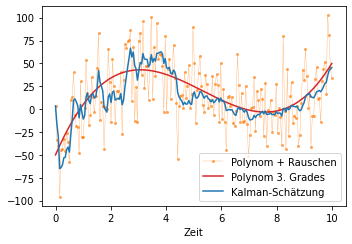

In [18]:
import numpy
import matplotlib.pyplot as plt

# Generate polynomial 
coeff = [-50, 70, -16, 1]
n = 200
ts = numpy.linspace(0,10,n)#创造时间间隔
deltaT = ts[1] - ts[0]
sigma = 30
nPoly = len(coeff)
y_polynomial = numpy.zeros(n)
for i,element in enumerate(coeff): # element = coeff 中的每一个值
    y_polynomial += coeff[i]*ts**i 
    #print(i)
    #print(element)
    #print(coeff[i]*ts)

# Noise
numpy.random.seed(3)
noise = sigma*numpy.random.randn(n)#求和


# Add noise to the signal
y = y_polynomial + noise

# Prepare Kalman estimation
D = numpy.zeros((nPoly,nPoly))
D[(numpy.arange(nPoly-1), numpy.arange(nPoly-1)+1)] = 1
Dt = D*deltaT
F = numpy.identity(nPoly) + Dt + Dt @ Dt/2 + Dt @ Dt @ Dt/6 #@是一个操作符，表示矩阵-向量乘法
H = numpy.zeros((1,nPoly))
H[0,0] = 1


# Initialize Kalman estimation
x = numpy.zeros(nPoly)
P = numpy.zeros((nPoly,nPoly))
P[numpy.diag_indices(nPoly)] += 50**2

# Start Kalman iteration
yEst = []
for i in range(len(y)):
    # Propagate
    if i > 0:
        x = F @ x
        P = F @ P @ F.T

    # Estimate
    K = P @ H.T @ numpy.linalg.inv(H @ P @ H.T + sigma)
    x = x + K @ (y[i] - H @ x)
    P = (numpy.identity(nPoly) - K @ H) @ P
    yEst.append(x[0])

# Plot
plt.figure(figsize=(5,3.5))
plt.plot(ts,y,'.-', color='C1', markersize=4, linewidth=0.4, alpha=0.6, label='Polynom + Rauschen')
plt.plot(ts,y_polynomial,'C3-', label='Polynom 3. Grades')
plt.plot(ts,yEst,'C0-',  label='Kalman-Schätzung')
plt.xlabel('Zeit')
plt.legend(loc=4)
plt.tight_layout()
# plt.show()

use sympy to do diffi.

In [ ]:
import cv2, numpy as np

meas=[]
pred=[]
frame = np.zeros((400,400,3), np.uint8) # drawing canvas
mp = np.array((2,1), np.float32) # measurement
tp = np.zeros((2,1), np.float32) # tracked / prediction

def onmouse(k,x,y,s,p):
    global mp,meas
    mp = np.array([[np.float32(x)],[np.float32(y)]])
    meas.append((x,y))

def paint():
    global frame,meas,pred
    for i in range(len(meas)-1): cv2.line(frame,meas[i],meas[i+1],(0,100,0))
    for i in range(len(pred)-1): cv2.line(frame,pred[i],pred[i+1],(0,0,200))

def reset():
    global meas,pred,frame
    meas=[]
    pred=[]
    frame = np.zeros((400,400,3), np.uint8)

cv2.namedWindow("kalman")
cv2.setMouseCallback("kalman",onmouse);
kalman = cv2.KalmanFilter(4,2)
kalman.measurementMatrix = np.array([[1,0,0,0],[0,1,0,0]],np.float32)
kalman.transitionMatrix = np.array([[1,0,1,0],[0,1,0,1],[0,0,1,0],[0,0,0,1]],np.float32)
kalman.processNoiseCov = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]],np.float32) * 0.03
#kalman.measurementNoiseCov = np.array([[1,0],[0,1]],np.float32) * 0.00003
while True:
    kalman.correct(mp)
    tp = kalman.predict()
    pred.append((int(tp[0]),int(tp[1])))
    paint()
    cv2.imshow("kalman",frame)
    k = cv2.waitKey(30) &0xFF
    if k == 27: break
    if k == 32: reset()

In [5]:
import numpy as np
a=np.ones((33,2))
len(a)

33